<a href="https://colab.research.google.com/github/Awaistolu/Machine-learning-projects/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize 
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report,confusion_matrix
from matplotlib import pyplot as plt
import plotly.express as px

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv('/content/amazonreviews.tsv',sep='\t')

In [3]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
df.shape

(10000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

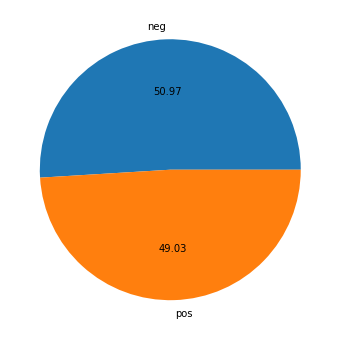

In [7]:
plt.figure(figsize=(12,6))
plt.pie(df['label'].value_counts(),labels=['neg','pos'],autopct='%.2f')
plt.show()

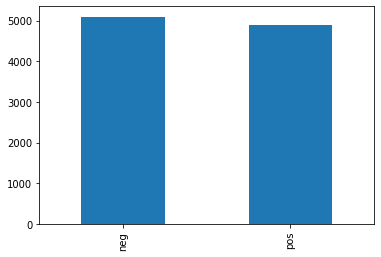

In [8]:
df['label'].value_counts().plot(kind='bar')
plt.show()

In [9]:
df['num_char'] = df['review'].apply(len)

In [10]:
df['num_words'] = df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [11]:
df['num_sents'] = df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [12]:
df.head()

,label,review,num_char,num_words,num_sents
0,pos,Stuning even for the non-gamer: This sound tra...,426,87,7
1,pos,The best soundtrack ever to anything.: I'm rea...,509,109,4
2,pos,Amazing!: This soundtrack is my favorite music...,760,165,4
3,pos,Excellent Soundtrack: I truly like this soundt...,743,145,4
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481,109,5


In [13]:
df[df['label'] =='neg'][['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,5097.000000,5097.000000,5097.000000
mean,449.159309,94.922111,5.134981
std,235.109588,48.575937,2.749166
min,101.000000,19.000000,1.000000
25%,252.000000,54.000000,3.000000
50%,407.000000,86.000000,5.000000
75%,615.000000,129.000000,7.000000
max,1015.000000,230.000000,22.000000


In [14]:
df[df['label'] =='pos'][['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,4903.000000,4903.000000,4903.000000
mean,427.817459,89.565572,4.823373
std,243.008547,49.910010,2.656410
min,101.000000,17.000000,1.000000
25%,222.000000,47.000000,3.000000
50%,370.000000,79.000000,4.000000
75%,594.000000,123.000000,6.000000
max,1015.000000,251.000000,21.000000


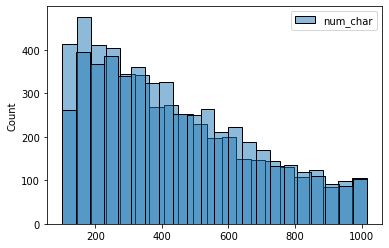

In [15]:
sns.histplot(df[df['label'] =='pos'][['num_char']])
sns.histplot(df[df['label'] =='neg'][['num_char']],color='red')

In [16]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [17]:
df['score'] = df['review'].apply(lambda x:sid.polarity_scores(x))

In [18]:
df['compound'] = df['score'].apply(lambda x:x['compound'])

In [19]:
df['comp_label'] = df['compound'].apply(lambda x:'pos' if x >=0 else 'neg')

In [20]:
df.head()

,label,review,num_char,num_words,num_sents,score,compound,comp_label
0,pos,Stuning even for the non-gamer: This sound tra...,426,87,7,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,509,109,4,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,760,165,4,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,743,145,4,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481,109,5,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [21]:
df['comp_label'].value_counts()

pos    6942
neg    3058
Name: comp_label, dtype: int64

In [22]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [23]:
print(classification_report(df['label'],df['comp_label']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [24]:
print(confusion_matrix(df['label'],df['comp_label']))

[[2623 2474]
 [ 435 4468]]


In [25]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
from nltk import stem
def transformed_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  
  text = y[:]
  y.clear()

  for i in text:
    if i not in set(stopwords.words('english')) and i not in set(string.punctuation):
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return ' '.join(y)


In [27]:
df['transformed_review'] = df['review'].apply(transformed_text)

In [28]:
df.head()

,label,review,num_char,num_words,num_sents,score,compound,comp_label,transformed_review
0,pos,Stuning even for the non-gamer: This sound tra...,426,87,7,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos,stune even sound track beauti paint seneri min...
1,pos,The best soundtrack ever to anything.: I'm rea...,509,109,4,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos,best soundtrack ever anyth read lot review say...
2,pos,Amazing!: This soundtrack is my favorite music...,760,165,4,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos,amaz soundtrack favorit music time hand intens...
3,pos,Excellent Soundtrack: I truly like this soundt...,743,145,4,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos,excel soundtrack truli like soundtrack enjoy v...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481,109,5,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos,rememb pull jaw floor hear play game know divi...


In [29]:
df['trf_score'] = df['transformed_review'].apply(lambda x:sid.polarity_scores(x))

In [30]:
df['trf_compound'] = df['trf_score'].apply(lambda x:x['compound'])

In [31]:
df['trf_comp_label'] = df['trf_compound'].apply(lambda x:'pos' if x >=0 else 'neg')

In [32]:
df.head()

,label,review,num_char,num_words,num_sents,score,compound,comp_label,transformed_review,trf_score,trf_compound,trf_comp_label
0,pos,Stuning even for the non-gamer: This sound tra...,426,87,7,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos,stune even sound track beauti paint seneri min...,"{'neg': 0.126, 'neu': 0.58, 'pos': 0.294, 'com...",0.8316,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,509,109,4,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos,best soundtrack ever anyth read lot review say...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.8834,pos
2,pos,Amazing!: This soundtrack is my favorite music...,760,165,4,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos,amaz soundtrack favorit music time hand intens...,"{'neg': 0.071, 'neu': 0.611, 'pos': 0.318, 'co...",0.9648,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,743,145,4,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos,excel soundtrack truli like soundtrack enjoy v...,"{'neg': 0.134, 'neu': 0.526, 'pos': 0.34, 'com...",0.9545,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481,109,5,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos,rememb pull jaw floor hear play game know divi...,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.9683,pos


In [33]:
df['trf_comp_label'].value_counts()

pos    7705
neg    2295
Name: trf_comp_label, dtype: int64